In [28]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')

In [29]:
def historical_data(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    return df

In [30]:
VAA = ['NFLX', 'MSFT']
Maindf = historical_data("SPY")
Maindf.index = pd.to_datetime(Maindf.timestamp) #set the index as the timestamp
#Maindf.index = pd.to_datetime(Maindf.index) #make the index datetime
Maindf = Maindf[['timestamp','adjusted_close']]
Maindf.columns = ["timestamp","SPY"]

for ticker in VAA:
    temp_df = historical_data(ticker)
    temp_df.index = pd.to_datetime(temp_df.timestamp) #set the index as the timestamp
    temp_df = temp_df[['adjusted_close']]
    temp_df.columns = [ticker]
    Maindf = Maindf.join(temp_df, how = "left")

Maindf.dropna(inplace = True)
Maindf = Maindf.sort_index()


In [31]:
data = Maindf[['SPY','MSFT','NFLX']]
perf = data.calc_stats()

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


In [32]:
data

,SPY,MSFT,NFLX
timestamp,,,
2002-05-23,79.9845,18.0844,1.1964
2002-05-24,78.9674,17.5698,1.2100
2002-05-28,78.5315,17.2597,1.1571
2002-05-29,77.9504,17.1706,1.1036
2002-05-30,77.7324,17.3653,1.0714
2002-05-31,77.8777,16.7946,1.0764
2002-06-03,75.8436,16.3030,1.1286
2002-06-04,75.9889,16.4878,1.1179
2002-06-05,76.7154,17.0420,1.1471


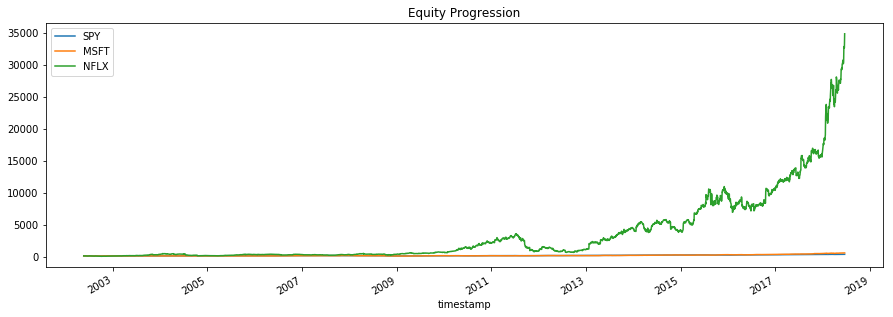

In [33]:
perf.plot()

In [34]:
perf.display()

Stat                 SPY         MSFT        NFLX
-------------------  ----------  ----------  ----------
Start                2002-05-23  2002-05-23  2002-05-23
End                  2018-06-20  2018-06-20  2018-06-20
Risk-free rate       0.00%       0.00%       0.00%

Total Return         245.13%     463.28%     34739.52%
Daily Sharpe         0.50        0.54        0.91
Daily Sortino        0.80        0.90        1.56
CAGR                 8.01%       11.35%      43.92%
Max Drawdown         -55.20%     -57.94%     -81.99%
Calmar Ratio         0.15        0.20        0.54

MTD                  2.34%       3.06%       18.55%
3m                   2.34%       9.85%       31.28%
6m                   4.26%       20.18%      120.75%
YTD                  4.32%       20.15%      117.14%
1Y                   15.71%      48.55%      174.13%
3Y (ann.)            11.45%      33.31%      63.03%
5Y (ann.)            13.97%      28.12%      67.18%
10Y (ann.)           9.95%       16.58%      57.34%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA5D908>,
      dtype=object)

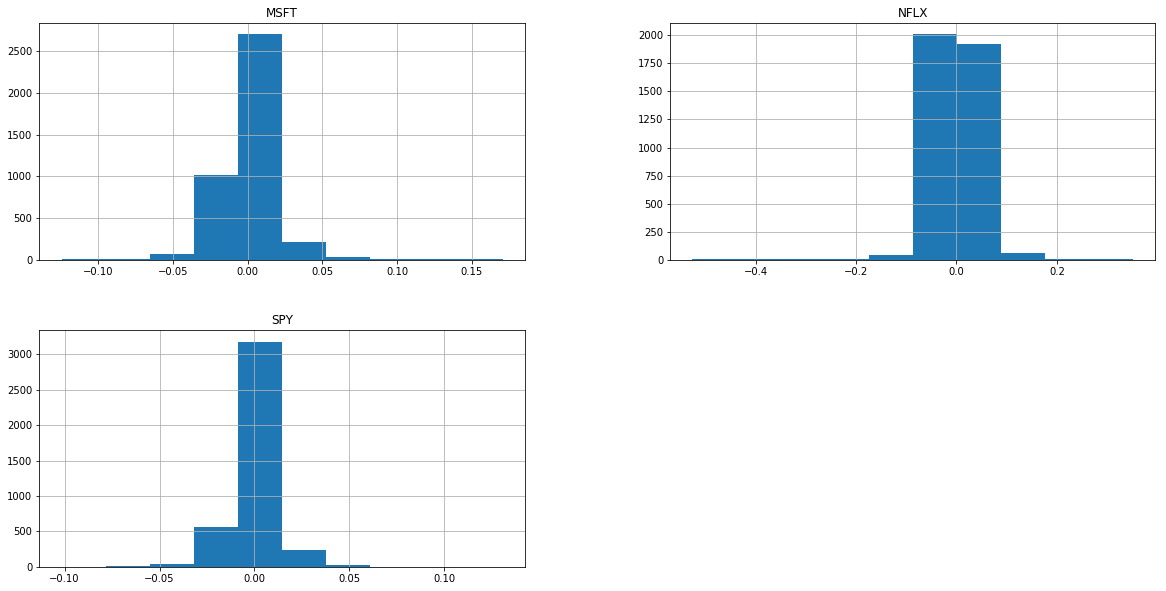

In [40]:
returns = data.to_log_returns().dropna()
returns.hist(figsize =(20,10))

In [41]:
returns.corr().as_format('.2f')

,SPY,MSFT,NFLX
SPY,1.00,0.69,0.31
MSFT,0.69,1.00,0.23
NFLX,0.31,0.23,1.00


<module 'matplotlib.pyplot' from 'C:\\Users\\scheng\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

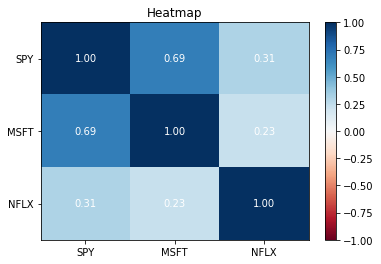

In [42]:
returns.plot_corr_heatmap()